In [3]:
import pandas as pd;
import matplotlib.pyplot as plt;

# Load Data and extract values

In [15]:
planets = pd.read_csv('data/Planets.csv')
planets.head()

,Planet,Mass,Diameter,DayLength,SunDistance,OrbitPeriod,OrbitVelocity,MeanTemperature,SurfacePressure,Moons,Rings,MagneticField,FirstVisited,FirstMission
0,MERCURY,0.330,4879,4222.6,57.9,88,47.4,167,0.00,0,No,Yes,1974-03-29,Mariner 10
1,VENUS,4.870,"12,104",2802.0,108.2,224.7,35.0,464,92.00,0,No,No,1962-08-27,Mariner 2
2,EARTH,5.970,"12,756",24.0,149.6,365.2,29.8,15,1.00,1,No,Yes,NaN,NaN
3,MOON,0.073,3475,708.7,NaN,27.3,1.0,-20,0.00,0,No,No,1959-09-12,Luna 2
4,MARS,0.642,6792,24.7,227.9,687,24.1,-65,0.01,2,No,No,1965-07-15,Mariner 4


In [22]:
# differrent metods to extract a column from a df
planets.Mass
planets['Mass']
planets.loc[:, 'Mass']

Planet                MERCURY
Mass                     0.33
Diameter                 4879
DayLength              4222.6
SunDistance              57.9
OrbitPeriod                88
OrbitVelocity            47.4
MeanTemperature           167
SurfacePressure           0.0
Moons                       0
Rings                      No
MagneticField             Yes
FirstVisited       1974-03-29
FirstMission       Mariner 10
Name: 0, dtype: object

## set_index

In [46]:
planets.set_index('Planet', inplace= True) # column Planets as index
planets.head(5)

,Mass,Diameter,DayLength,SunDistance,OrbitPeriod,OrbitVelocity,MeanTemperature,SurfacePressure,Moons,Rings,MagneticField,FirstVisited,FirstMission
Planet,,,,,,,,,,,,,
MERCURY,0.330,4879,4222.6,57.9,88,47.4,167,0.00,0,No,Yes,1974-03-29,Mariner 10
VENUS,4.870,"12,104",2802.0,108.2,224.7,35.0,464,92.00,0,No,No,1962-08-27,Mariner 2
EARTH,5.970,"12,756",24.0,149.6,365.2,29.8,15,1.00,1,No,Yes,NaN,NaN
MOON,0.073,3475,708.7,NaN,27.3,1.0,-20,0.00,0,No,No,1959-09-12,Luna 2
MARS,0.642,6792,24.7,227.9,687,24.1,-65,0.01,2,No,No,1965-07-15,Mariner 4


## loc & iloc

In [44]:
planets.loc['MERCURY'] # select row by name with loc
planets.loc['MERCURY', 'Mass':'OrbitVelocity']


planets.iloc[0] # integer base indexing
planets.iloc[2:5][['Mass', 'DayLength']]
planets.iloc[2:5, 0:3]

,Mass,Diameter,DayLength
Planet,,,
EARTH,5.970,"12,756",24.0
MOON,0.073,3475,708.7
MARS,0.642,6792,24.7


In [39]:
# methods select the FirstVisited Value of 'MERCURY'
planets.FirstVisited['MERCURY'] 
planets.loc['MERCURY'].FirstVisited
planets.loc['MERCURY', 'FirstVisited']

'1974-03-29'

In [41]:
# data type of the value
type(planets.loc['MERCURY', 'FirstVisited'])

planets.FirstVisited = pd.to_datetime(planets.FirstVisited) # convert str to date time
type(planets.loc['MERCURY', 'FirstVisited'])


2022 - planets.FirstVisited.dt.year # calculations are possible now

pandas._libs.tslibs.timestamps.Timestamp

# Encoding

In [ ]:
pd.read_csv('data/billboard.csv') # encoding error!

In [10]:
# find right encoding - in the console try 'file billboard.csv'
with open('data/billboard.csv') as f:
    print(f)

<_io.TextIOWrapper name='data/billboard.csv' mode='r' encoding='UTF-8'>


In [11]:
billboard = pd.read_csv('data/billboard.csv', encoding='latin-1') # encoding='latin-1' is a good thing to try
billboard.head(2)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


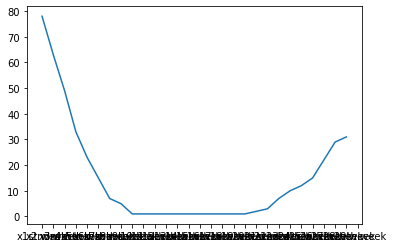

In [46]:
plt.plot(billboard.loc[0, 'x1st.week':'x76th.week']); # matplot fetches the column names as labels 

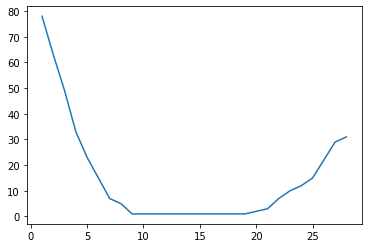

In [47]:
plt.plot(range(1, 77), billboard.loc[0, 'x1st.week':'x76th.week']); # uses a range as indexes

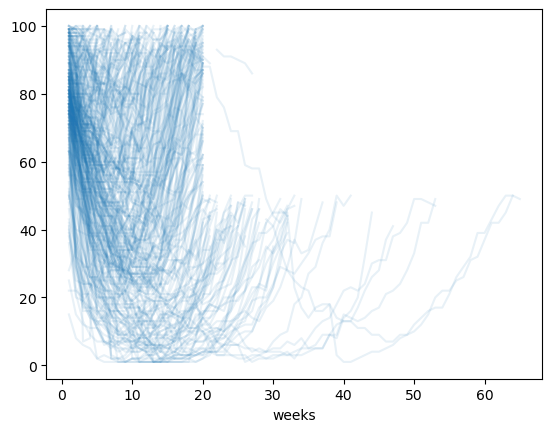

In [12]:
for index, row in billboard.iterrows(): # iterrrows returns index and whole row as a series (index, row_series)
    plt.plot(range(1, 77), row['x1st.week':'x76th.week'], color='C0', alpha=0.1)
    plt.xlabel('weeks')

# Data Cleaning

In [49]:
# select abbriviated info 
bshort = billboard[['artist.inverted', 'track', 'time',  'date.entered','x1st.week', 'x2nd.week', 'x3rd.week']] 
bshort.columns = ['artist', 'track', 'time',  'date.entered','wk1', 'wk2', 'wk3'] # rename columns
bshort.head(2)

,artist,track,time,date.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0


## melt

In [50]:
bmelt = bshort.melt(
    ["artist", "track", "time", "date.entered"], # columns that remain columns
    ["wk1", "wk2", "wk3"], # three columns go to rows there values in another column
    "week", "rank"  # names for the two (labels, values) new columns
)

bmelt.query('track == "Liar"')  # query the df with a boolean search

,artist,track,time,date.entered,week,rank
66,Profyle,Liar,3:57,2000-09-16,wk1,52.0
383,Profyle,Liar,3:57,2000-09-16,wk2,32.0
700,Profyle,Liar,3:57,2000-09-16,wk3,25.0


## extract info

In [51]:
# transform the string 'wk1' to an integer '1'
bmelt['week'] = bmelt['week'].apply(lambda s: int(s[2:])) 
bmelt.head(2)

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0


## datetime arithmetic

In [52]:
# change to datetime 
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered']) 

# date entered plus 7 days for every week in the charts, starting from the second week (7 days * week - 1)
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt.week - 1) 

bmelt.drop(['date.entered'], axis = 1, inplace=True) # drop initial date column

bmelt.query('track == "Liar"')  # see result week1 is intial entry date, week2 = week1 + 7days ...

,artist,track,time,week,rank,date
66,Profyle,Liar,3:57,1,52.0,2000-09-16
383,Profyle,Liar,3:57,2,32.0,2000-09-23
700,Profyle,Liar,3:57,3,25.0,2000-09-30


In [53]:
bfinal = bmelt[[ 'artist', 'track', 'time', 'date', 'week', 'rank']]
bfinal.sort_values(['artist', 'track'], inplace=True)
bfinal.head()  # tidy table - with redundancies

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


# Normalization
- Normalization is the process of organizing a database to reduce redundancy and improve data integrity.
- Normalization also simplifies the database design so that it achieves the optimal structure composed of atomic elements <br>
  (i.e. elements that cannot be broken down into smaller parts).
- By normalizing a database, you arrange the data into tables and columns.  
- You ensure that each table contains only related data. If data is not directly related, you create a new table for that data.
- Here it means removing of redundancies by splitting the melted table into tables with unique values.

In [54]:
tracks = bfinal[[ 'artist', 'track', 'time']].drop_duplicates() # table with unique tracks, not for every week the sam track info
tracks.head() # index is unique and synonym with the individual tracks

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35


In [55]:
# the index a column can be used to identify our tracks

# transform index to a named column
tracks.index.name = 'id'  

# set a new default index 
tracksid = tracks.reset_index() 

# id is now synonym with the track and can be used as a primary key to connect tables
tracksid.head() 

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53
3,193,3 Doors Down,Loser,4:24
4,69,504 Boyz,Wobble Wobble,3:35


In [56]:
# tidy table 
# stores data that is not in tracksid, id is the primary key connecting both tables
# first merge on tracks, artist and time then drop these columns to attach the id's
tidy = pd.merge(tracksid, bfinal, on=['track', 'artist', 'time']).drop(['track', 'artist', 'time'], axis=1)
tidy.head()

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0


In [57]:
# most favoured track  -  low rank = high acclaim
# idxmin gives index of the min in the given column
tidy.loc[tidy[tidy.week == 1]['rank'].idxmin()] 

tracksid.query('id == 1') # find the corresponding track by id

,id,artist,track,time
252,1,Santana,"Maria, Maria",4:18


# melting & slicing

In [60]:
import pandas as pd
tb = pd.read_csv('data/tb.csv')
tb.head(3)

,country,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
tb.columns

Index(['country', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

In [58]:
melted = tb.melt(
    [ "country", "year", ],
    [ "m04", "m514", "m014", "m1524", "m2534", "m3544", "m4554", "m5564", "m65", "mu", 
     "f04", "f514", "f014", "f1524", "f2534", "f3544", "f4554", "f5564", "f65", "fu", ],
    "sex_age",
    "cases",
)

melted.head(2)

,country,year,sex_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN


In [59]:
# slice(from, to , step)
melted['sex'] = melted.sex_age.str.slice(0,1)
melted['age'] = melted.sex_age.str.slice(1)
melted.head(2)

,country,year,sex_age,cases,sex,age
0,AD,1989,m04,NaN,m,04
1,AD,1990,m04,NaN,m,04


In [60]:
import numpy as np
# dictionary to map propper names
melted.age = melted.age.map(
    {
        "04": "0-4",
        "514": "5-14",
        "014": "0-14",
        "1524": "15-24",
        "2534": "24-34",
        "3544": "35-44",
        "4554": "45-54",
        "5564": "55-64",
        "65": "65+",
        "u": np.nan,
    }
)

In [21]:
melted.age

0         0-4
1         0-4
2         0-4
3         0-4
4         0-4
         ... 
115375    NaN
115376    NaN
115377    NaN
115378    NaN
115379    NaN
Name: age, Length: 115380, dtype: object

In [62]:
melted.isnull().sum()

country      460
year           0
sex_age        0
cases      79630
sex            0
age        11538
dtype: int64

In [63]:
final = melted.dropna(subset= ['cases']) # drop rows where there is no info for cases
final.sort_values(['country', 'year', 'age', 'sex']) # custom sort
final = final[['country', 'year', 'age', 'sex', 'cases']] # column selection and order
final

,country,year,age,sex,cases
15,AD,2005,0-4,m,0.0
16,AD,2006,0-4,m,0.0
18,AD,2008,0-4,m,0.0
42,AE,2006,0-4,m,0.0
43,AE,2007,0-4,m,0.0
...,...,...,...,...,...
115195,VU,2008,NaN,f,0.0
115269,YE,2008,NaN,f,0.0
115323,ZA,2008,NaN,f,0.0
115350,ZM,2008,NaN,f,0.0


In [64]:
# missing values?
final.isnull().sum()

country    198
year         0
age        545
sex          0
cases        0
dtype: int64